# **Project Name**    - Online Retail Customer Segmentation 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -Umesh Pardeshi**
##### **Team Member 2 -Suvarna Gadkh**
##### **Team Member 3 -Priyanka Kumari**
##### **Team Member 4 -Sakshi Suthar**

# **Project Summary -**

We have done this project through team coordination, our team contains four members i.e Umesh pardeshi, Suvarna gadakh, Sakshi suthar, and Priyanka Kumari. 
the data set given by a company that sells unique gift items online. The data set given in the excel format contains a total of 541909 rows and 8 columns.
8 columns include data as follows.
1.  InvoiceNo contains unique bill number given data in the form of  object  data type       
2.  StockCode contains a unique stock/gift code  given data in the form of  object  data type 
3.   Description contains a brief description of gift items given data in the form of  object  data type 
4.   Quantity contains the total number of gift items quantity given data in the form of  int data type  
5.   InvoiceDate contains the date of purchase   given data in the form of  datetime  data type 
6.   UnitPrice contains gift price per item given data in the form of  float  data type    
7.   CustomerID contains customer id  given data in the form of  float  data type    
8.  Country contains the respective country name belonging to the customer 


firstly we loaded the given data set in the colab environment bus using the pandas read function. then we have to check the data first look using the head function.
after overviewing the data set, we have done exploratory data analysis. we extracted some useful data insight by comparing variables using the arithmetic operator.
after that, we plotted graphs using plotting, seaborn, and plots to visualize all insight found in exploratory data analysis.
then we have done hypothesize testing on resultant variables, Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. It is used to estimate the relationship between 2 statistical variables. to perform a hypothesis test we used the z test, When the variances are known and the sample size is high, a z-test is a statistical test to assess if two population means are different. A hypothesis test known as a z-test is one in which the z-statistic has a normal distribution. A z-statistic, also known as a z-score, is a numerical representation of the outcome of a z-test.
then we did Feature Engineering & Data Pre-processing, in this part we handles missing values, prepare data for modeling, and handled outliers and data scaling.
the final part is data modeling here we have formed clusters using Kmeans cluster and silhouette analysis and finally, we have visualized all clusters using dendrograms.
in this way, we have done an Online Retail Customer Segmentation unsupervised capstone project.
 here are  insights we get,

*  White Hanging heat T-Light holder is the most demanding gift of all.
*  Lunch bag black skull is the least demanding gift of all.

*  The UK has placed maximum orders for unique gift items.
*  After the UK, Germany placed maximum orders for unique gift items.

*  The UK has to purchase a total of $4.2 million in gift items.

*  The Netherlands has purchased a total of $200 k gift items.

*  Online retail gift shop generates $ 8 + million in revenue from the UK only.

*  WORLD WAR 2 GLIDERS is the most bought item ever with 53847 quantity.

* DOT stock code gift generated a total of $ 2,06,245 in revenue.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [288]:
# Import Libraries

#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
from datetime import datetime
from datetime import date

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Dataset Loading

In [289]:
# Load Dataset
file_path="/content/Online Retail.xlsx"
df= pd.read_excel(file_path)

### Dataset First View

In [290]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [291]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [292]:
# Dataset Rows & Columns count
print(df.shape)
print(f"total number of rows in given data set is {df.shape[0]}")
print(f"total number of columns in given data set is {df.shape[1]}")

(541909, 8)
total number of rows in given data set is 541909
total number of columns in given data set is 8


### Dataset Information

In [293]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [294]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

#### Missing Values/Null Values

In [295]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

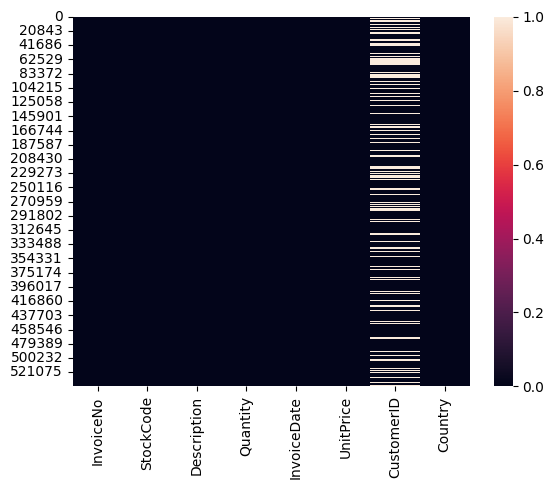

In [296]:
# Visualizing the missing values
sns.heatmap(df.isnull() )

### What did you know about your dataset?

As we seen in above missing values visualizing  plot.we can see out of 8 coloumn 2 columns have missong values.
CustomerID columns has total 135080 missing values and column Description  has 1454 missiung values.

## ***2. Understanding Your Variables***

In [297]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [298]:
# Dataset Describe
df.describe(include='all')

<ipython-input-298-1fb2dbb7a3f1>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


### Variables Description 

**Fields**   :     **Description**

**Invoice NO**   :   Invoice number

**Stock Code**   :  Stock name code

**Description**  :  Description of product

**Quantity**     :  Quantity bought

**InvoiceDate**  :  Invoice date

**UnitPrice**    :  Price per unit

**Customer ID**  :  Unique customer id

**Country**      :  location

### Check Unique Values for each variable.

In [299]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [300]:
# Write your code to make your dataset analysis ready.
# created new column total sell
df['Total_sell']=df["Quantity"]*df["UnitPrice"]



In [301]:
# data set column after adding new column
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_sell'],
      dtype='object')

In [302]:
# Most Baught Items
baught_iteams=df.Description.value_counts()
baught_iteams=baught_iteams.sort_values(ascending=False).reset_index().head(10)
baught_iteams.columns = ['Item Description', 'Count']
baught_iteams

,Item Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
5,ASSORTED COLOUR BIRD ORNAMENT,1501
6,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,PACK OF 72 RETROSPOT CAKE CASES,1385
8,LUNCH BAG BLACK SKULL.,1350
9,NATURAL SLATE HEART CHALKBOARD,1280


In [303]:
# Total  Purchase Count As on country
Total_country=df.Country.value_counts()
Total_country=Total_country.reset_index()
Total_country.columns = ['Country Name', 'Count']
Total_country

,Country Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [304]:
# Top  10 item purchase By country
most_iteam_purchase=df.groupby(["Country"])['Quantity'].sum()
most_iteam_purchase=most_iteam_purchase.sort_values(ascending=False).head(10).reset_index()
most_iteam_purchase

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


In [305]:
# Top 10 country from where retail shops earns more
Top_earning=df.groupby(['Country'])['Total_sell'].sum()
Top_earning=Top_earning.sort_values(ascending=False).reset_index().head(10)
Top_earning

,Country,Total_sell
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [306]:
# most baught itam
Most_baught_item=df.groupby(["Description"]).agg({'Quantity':sum,'Total_sell':sum})
Most_baught_item=Most_baught_item.sort_values( by=['Quantity','Total_sell'], ascending=False).head(5)

# Most_baught_item.sort_values( by=['Quantity','Total_sell'], ascending=False)

Most_baught_item




,Quantity,Total_sell
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
JUMBO BAG RED RETROSPOT,47363,92356.03
ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
POPCORN HOLDER,36334,33969.46
PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72


In [307]:
# High revenue generated as on stock code
total_sell_asstockcoed=df.groupby(["StockCode"])['Total_sell'].sum().sort_values(ascending=False).reset_index().head()
total_sell_asstockcoed

,StockCode,Total_sell
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03


In [308]:
# Top 10 high cost invoce generated

top_invice=df.groupby(['InvoiceNo'])['Total_sell'].sum().sort_values(ascending=False).reset_index().head(10)
top_invice

,InvoiceNo,Total_sell
0,581483,168469.60
1,541431,77183.60
2,574941,52940.94
3,576365,50653.91
4,556444,38970.00
5,567423,31698.16
6,556917,22775.93
7,572209,22206.00
8,567381,22104.80
9,563614,21880.44


In [309]:

# top 10 most purchase item  invoce generated

top_Quant_invice=df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
top_Quant_invice



,InvoiceNo,Quantity
0,581483,80995
1,541431,74215
2,556917,15049
3,563076,14730
4,574941,14149
5,576365,13956
6,572035,13392
7,567423,12572
8,578841,12540
9,552883,12266


### What all manipulations have you done and insights you found?

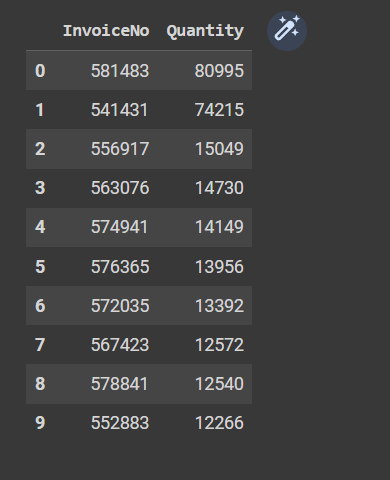


*  invoice NO 581483 contains a total of 80995 quantity gift items.


*  invoice NO  541431	contain a total	of 74215 quantity gift items.

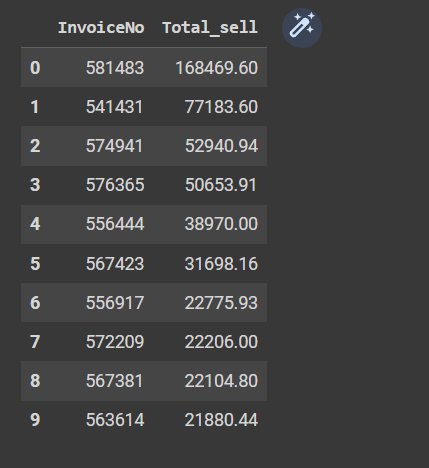

 * invoice NO 581483 has a total of $ 168469 sold.


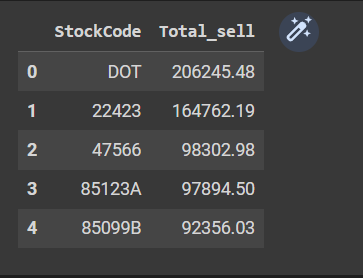

*  DOT stock code gift generated a total of $ 2,06,245 in revenue.

*  22423 Stock code gift generated a total of $ 1,64,762 in revenue.

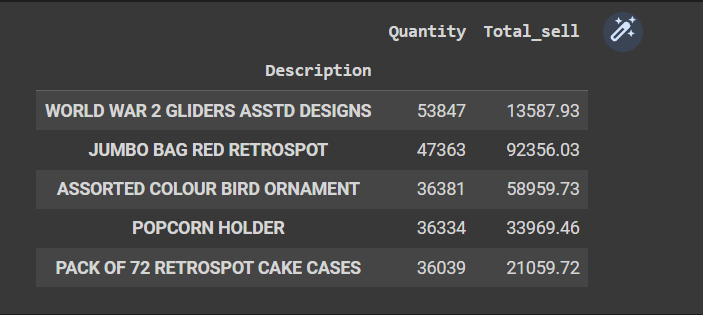

WORLD WAR 2 GLIDERS is the most bought item ever with 53847 quantity.

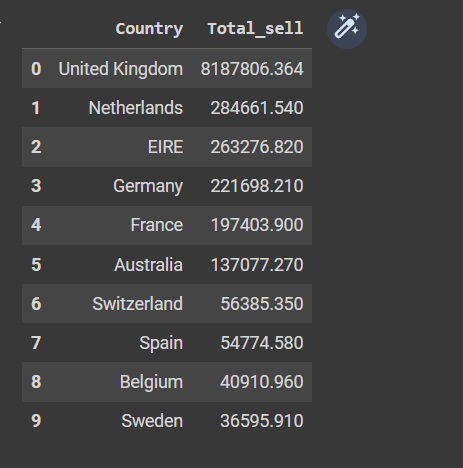

Online retail gift shop generates $ 8 + million in revenue from the UK only.

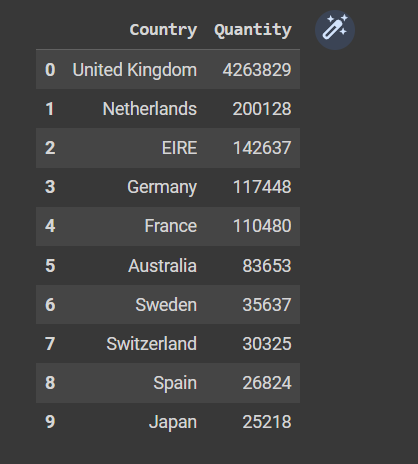

*  The UK has to purchase a total of $4.2 million in gift items.

*  The Netherlands has purchased a total of $200 k gift items.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Pie Chart - 1 

In [310]:
# Chart - 1 visualization code
fig = px.pie(baught_iteams, values='Count', names='Item Description', title='Most baught item')
fig.show()

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data. A pie chart requires a list of categorical variables and numerical variables. Here, the term “pie” represents the whole, and the “slices” represent the parts of the whole.

##### 2. What is/are the insight(s) found from the chart?

*  White Hanging heat T-Light holder is most demanding gift among all.
*  Lunch bag black skull is least demanding gift among all.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

All the gift items has almost equally baught share expect Natural slate heart chalk board and lunch bag black skull.

####Pie Chart - 2

In [311]:
# Chart - 2 visualization code
fig = px.pie(Total_country, values='Count', names='Country Name',
             title='Number of times order placed by country',
             hover_data=['Country Name'], labels={'Country Name':'Country Name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data. A pie chart requires a list of categorical variables and numerical variables. Here, the term “pie” represents the whole, and the “slices” represent the parts of the whole.

##### 2. What is/are the insight(s) found from the chart?

*  UK has placed maximum order for unique gift items.
*  After UK, Germany  placed maximum order for unique gift items.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given insight leads to negative growth, 90+% of order share are from UK only.

#### Bar Chart - 3

In [312]:
# Chart - 3 visualization code
fig = px.bar(most_iteam_purchase, x='Country', y='Quantity')
fig.show()

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.

##### 2. What is/are the insight(s) found from the chart?

*  The UK has purchase total of $4.2 million in gifts items.

*  the Netherlands has purchase total of $200 k gifts items.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given insight leads to negative growth because alomst 90+% revenue generated by UK only.

#### Bar Chart - 4

<Axes: xlabel='Country', ylabel='Total_sell'>

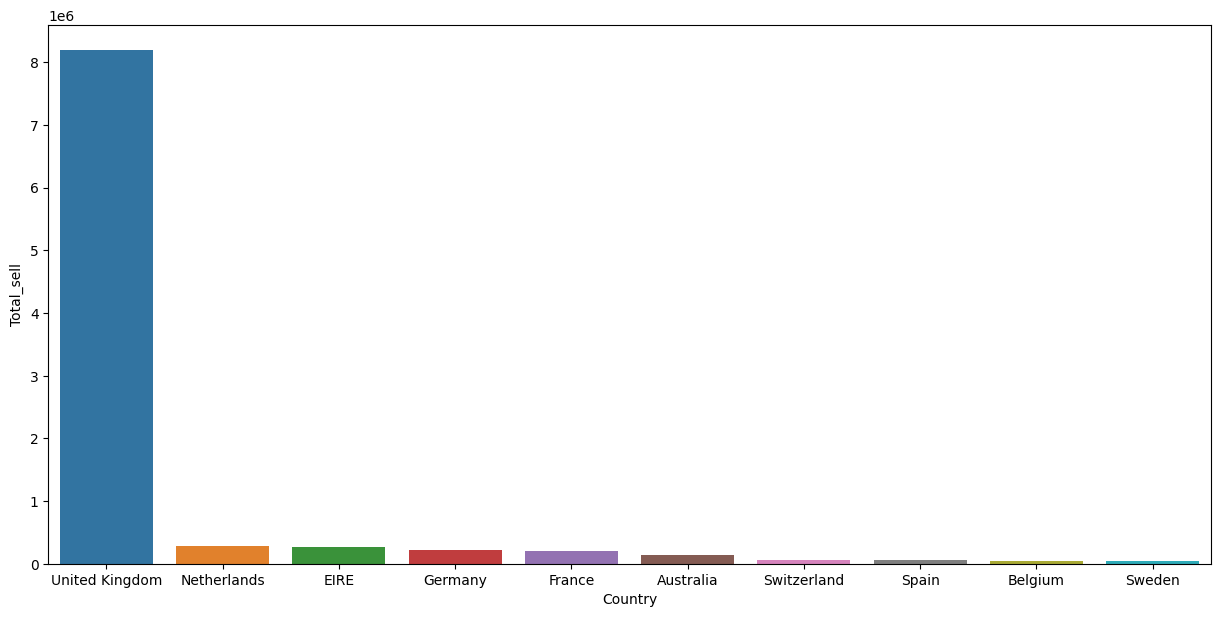

In [313]:
# Chart - 4 visualization code
plt.figure(figsize=(15,7))
sns.barplot(data=Top_earning, x="Country", y="Total_sell")

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.

##### 2. What is/are the insight(s) found from the chart?

Online retail gift shop generates $ 8 +  million revenue from UK only.
 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Given insight shows negative growth because 91% of revenue out of 100 generated by UK only.

#### Chart - 5

Axes(0.125,0.11;0.62x0.77)


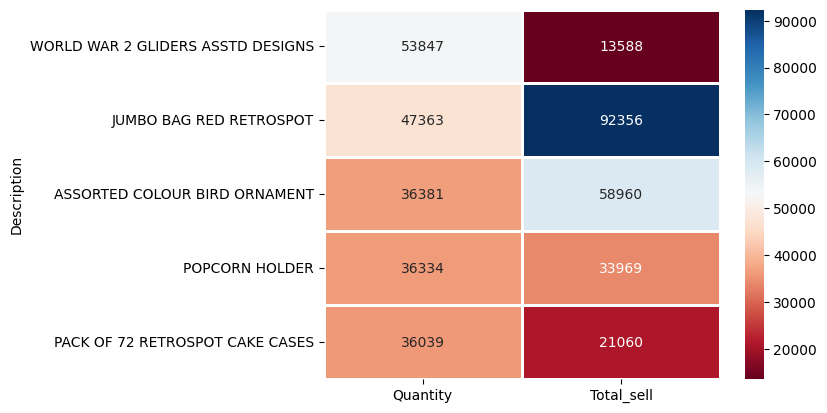

In [314]:
# Chart - 5 visualization code
Most_baught_item=sns.heatmap(Most_baught_item, cmap='RdBu' , annot=True , fmt=".0f",linewidths=1 )
print(Most_baught_item)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

WORLD WAR 2 GLIDERS is most bought items ever with 53847 quantity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

given insight shows positive impact towards growth.

#### Bar Chart - 6

<Figure size 640x480 with 0 Axes>

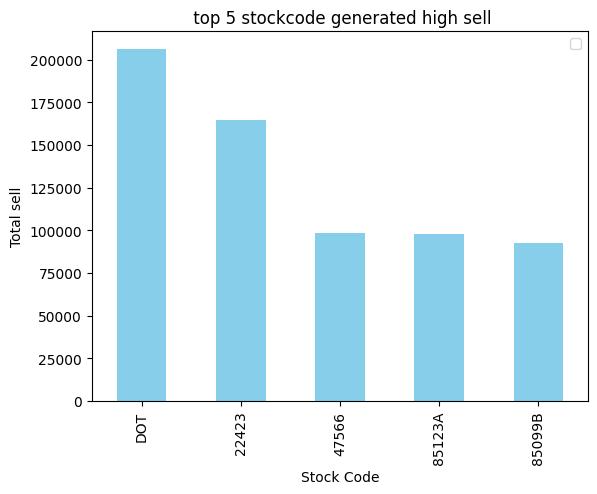

In [315]:
# Chart - 6 visualization code
plt.figure()

total_sell_asstockcoed.plot.bar(x ='StockCode', y='Total_sell', rot=0, color='skyblue')
plt.xlabel('Stock Code')
plt.ylabel('Total sell')
plt.title(' top 5 stockcode generated high sell')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.

##### 2. What is/are the insight(s) found from the chart?

*  DOT stock code gift generated a total $ 2,06,245 in revenue.

*  22423 Stock code gift generated a toral $ 1,64,762 in revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

given insight shows positive impact towards growth becausae avg sock code gift generated total $ 125000 revenue.

#### Pie Chart - 7

In [316]:
# Chart - 7 visualization code
fig = px.pie(top_invice, values='Total_sell', names='InvoiceNo', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data. A pie chart requires a list of categorical variables and numerical variables. Here, the term “pie” represents the whole, and the “slices” represent the parts of the whole.

##### 2. What is/are the insight(s) found from the chart?

*  invoice NO 581483 has a total of $	168469 sold.

*  invoice NO 541431 has a total of  $	77183.60 sold.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Line Chart - 8

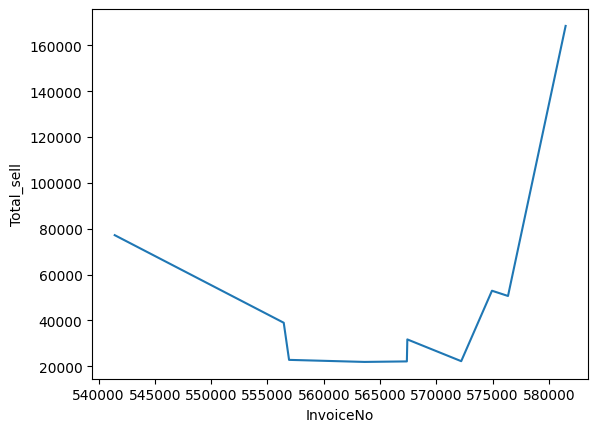

In [317]:
# Chart - 8 visualization code
sns.lineplot(x="InvoiceNo", y="Total_sell", data=top_invice)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is a type of chart that provides a visual representation of data in the form of points that are connected in a straight line. A line chart is one of the simplest methods to understand any financial data and trading data. Let us discuss more a line chart, the types, advantages and disadvantages, and solve a few examples as well.

##### 2. What is/are the insight(s) found from the chart?

*  invoice NO 581483 has a total of $ 168469 sold.

*  invoice NO 541431 has a total of $ 77183.60 sold.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Bar Chart - 9

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



<Figure size 640x480 with 0 Axes>

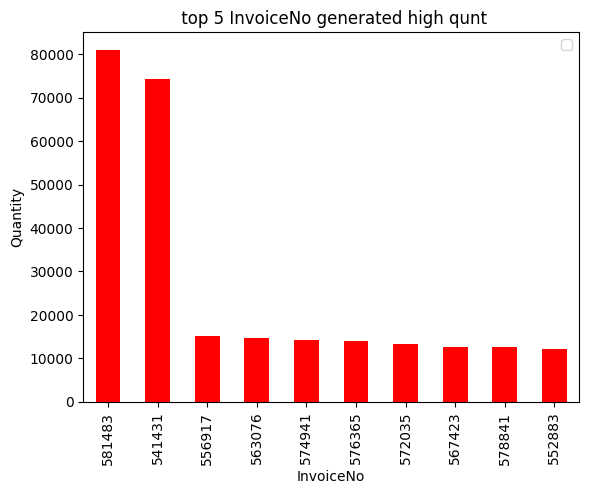

In [318]:
# Chart - 9 visualization code
plt.figure()

top_Quant_invice.plot.bar(x ='InvoiceNo', y='Quantity', rot=0, color='red')
plt.xlabel('InvoiceNo')
plt.ylabel('Quantity')
plt.title(' top 5 InvoiceNo generated high qunt')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.

##### 2. What is/are the insight(s) found from the chart?

*  invoice NO 581483 contain a  total of	80995 quantity gift items.


*  invoice NO  541431	contain a total	of 74215 quantity gift items.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

.

#### Chart - 10 - Correlation Heatmap

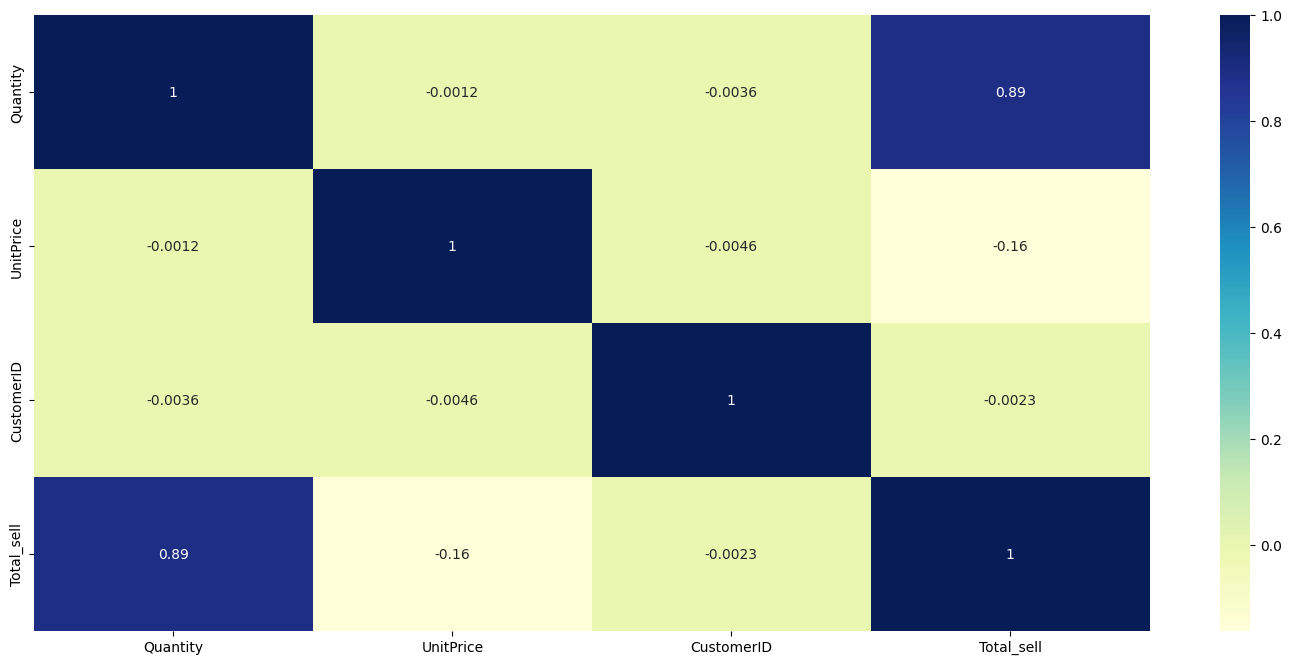

In [319]:
# Correlation Heatmap visualization code
# plotting co realtion heat map
plt.figure(figsize=(18, 8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

##### 2. What is/are the insight(s) found from the chart?

column Quantity is highly co related to total sell  columns.

#### Chart - 15 - Pair Plot 

In [320]:
# Pair Plot visualization code
# sns.pairplot( df)

##### 1. Why did you pick the specific chart?

A pair plot is a data visualization that plots pair-wise relationships between all the variables of a dataset. This allows you to better understand the relationships visually, while even layering in additional details (such as by using color). Each variable is plotted both in the rows and columns, showing the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   Is 9 quantity of gift buying across UK region?
*   Is 4$ price for each gift product?



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 9

Alternate Hypothesis : N < 9

Test Type: Z test

Is 9 quantity of gift buying across UK region?

#### 2. Perform an appropriate statistical test.

In [321]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['Quantity'].mean())
df[['Quantity']].describe()
ztest ,propability_value = stests.ztest(df['Quantity'], x2=None, value=9)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

9.55224954743324
P Value is : 0.062300913172767466
Null hyphothesis accepted , Alternative hyphothesis rejected


##### Which statistical test have you done to obtain P-Value?

Z-Test

##### Why did you choose the specific statistical test?

When the variances are known and the sample size is high, a z-test is a statistical test to assess if two population means are different. A hypothesis test known as a z-test is one in which the z-statistic has a normal distribution. A z-statistic, also known as a z-score, is a numerical representation of the outcome of a z-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 4

Alternate Hypothesis : N < 4

Test Type: Z test

Is 4$ price for each gift product?

#### 2. Perform an appropriate statistical test.

In [322]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['UnitPrice'].mean())
df[['UnitPrice']].describe()
ztest ,propability_value = stests.ztest(df['UnitPrice'], x2=None, value=4)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")


4.611113626088513
P Value is : 3.330223529043396e-06
Null hyphothesis rejected , Alternative hyphothesis accepted


##### Which statistical test have you done to obtain P-Value?

Z-test

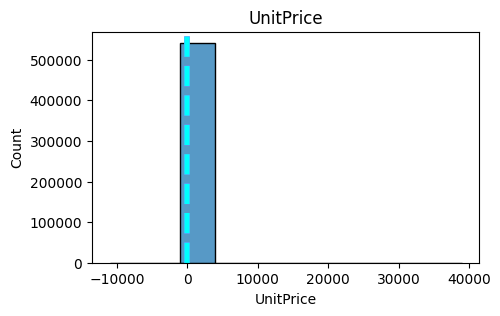

In [323]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['UnitPrice'])
sns.histplot(df['UnitPrice'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('UnitPrice')
plt.show()

##### Why did you choose the specific statistical test?

When the variances are known and the sample size is high, a z-test is a statistical test to assess if two population means are different. A hypothesis test known as a z-test is one in which the z-statistic has a normal distribution. A z-statistic, also known as a z-score, is a numerical representation of the outcome of a z-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 17

Alternate Hypothesis : N < 17

Test Type: Z test

Is total sell of unique product is 17?

#### 2. Perform an appropriate statistical test.

In [324]:
# Perform Statistical Test to obtain P-Value
print(df['Total_sell'].mean())
df[['Total_sell']].describe()
ztest ,propability_value = stests.ztest(df['Total_sell'], x2=None, value=16)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

17.98779487699964
P Value is : 0.00011205335704471761
Null hyphothesis rejected , Alternative hyphothesis accepted


##### Which statistical test have you done to obtain P-Value?

Z tset

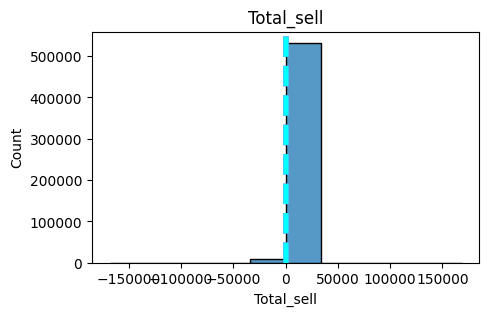

In [325]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['Total_sell'])
sns.histplot(df['Total_sell'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('Total_sell')
plt.show()

##### Why did you choose the specific statistical test?

When the variances are known and the sample size is high, a z-test is a statistical test to assess if two population means are different. A hypothesis test known as a z-test is one in which the z-statistic has a normal distribution. A z-statistic, also known as a z-score, is a numerical representation of the outcome of a z-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_sell          0
dtype: int64


<Axes: >

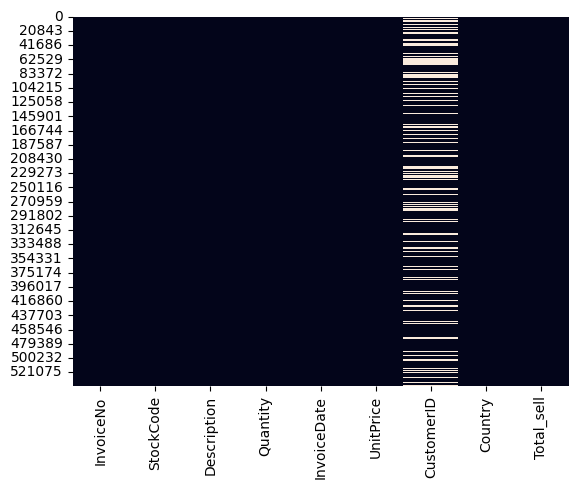

In [326]:
# Missing Values/Null Values Count
print(df.isnull().sum())


# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [327]:
# missing values percentage
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Total_sell      0.00
dtype: float64

In [328]:
# droping all rows having missing values
df = df.dropna()
df.shape

(406829, 9)

In [329]:
# After dropping null values data set view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### What all missing value imputation techniques have you used and why did you use those techniques?

we have removed columns which have most missing values.

In [330]:
# total revenue generated
# monetary
total_revenue = df.groupby('CustomerID')['Total_sell'].sum()
total_revenue = total_revenue.reset_index()
total_revenue.head()

,CustomerID,Total_sell
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [331]:
# total_transaction
total_transaction = df.groupby('CustomerID')['InvoiceNo'].count()
total_transaction = total_transaction.reset_index()
total_transaction.columns = ['CustomerID', 'Total_transaction']
total_transaction.head()

,CustomerID,Total_transaction
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [332]:
# merging total transction and total sell
# merge the two dfs
total_revenue = pd.merge(total_revenue, total_transaction, on='CustomerID', how='inner')
total_revenue.head()

,CustomerID,Total_sell,Total_transaction
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [333]:
# last day purchase 
# max day
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [334]:
# compute the diff
df['day_difference'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell,day_difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [335]:
# recency
recent_purchase = df.groupby('CustomerID')['day_difference'].min()
recent_purchase = recent_purchase.reset_index()
recent_purchase.head()

,CustomerID,day_difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [336]:
# merging  total sell, day_difference and total_transaction
grouped_df = pd.merge(total_revenue, recent_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [337]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### 2. Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6ea84aa970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6ea84aad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6ea84aa6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ea8499310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ea84995b0>],
 'means': []}

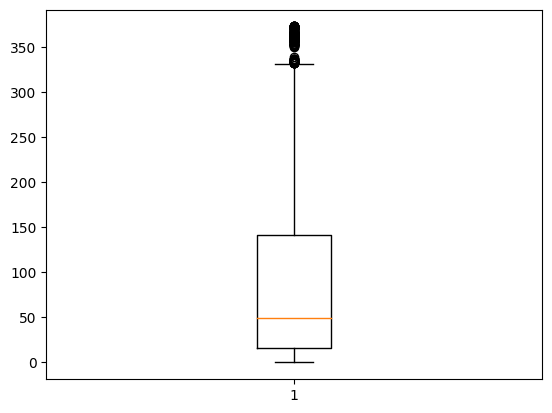

In [338]:
# Handling Outliers & Outlier treatments
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

In [339]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



{'whiskers': [<matplotlib.lines.Line2D at 0x7f6eab61fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6eaa8cf0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6eab61f940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eaa8cf5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eaa8cf880>],
 'means': []}

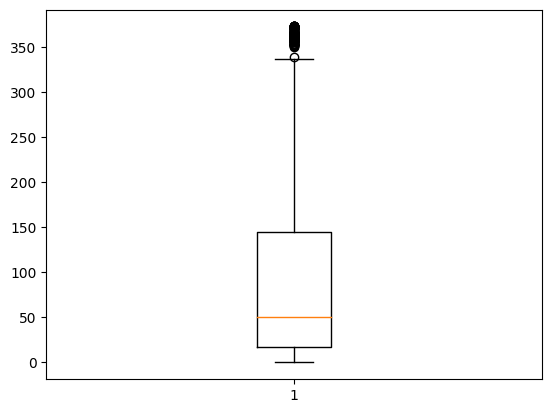

In [340]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6ea30499a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6ea3049ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6ea3049700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ea300d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ea300d700>],
 'means': []}

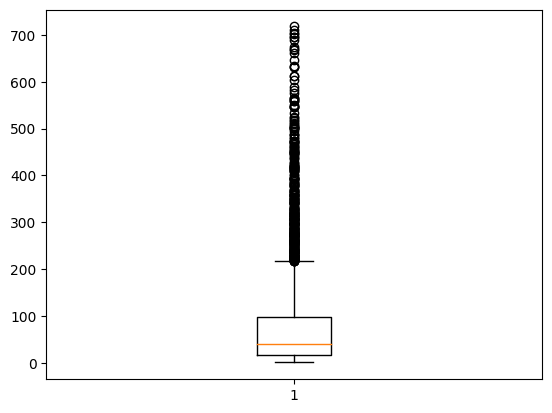

In [341]:
# 2. outlier treatment
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6ea8348220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6ea8348760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6ea8347f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ea8348ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ea8348f40>],
 'means': []}

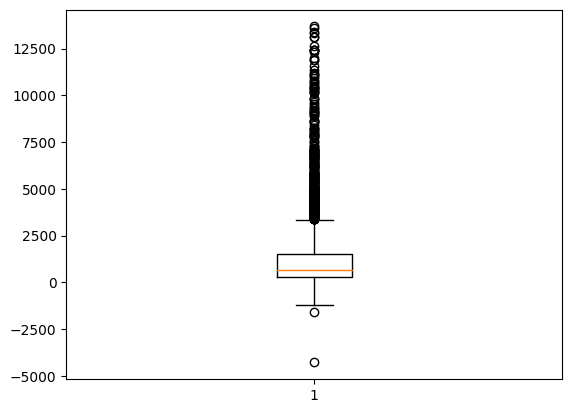

In [342]:
# 3. outlier treatment
plt.boxplot(grouped_df['amount'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Winsorized mean is a method of averaging that initially replaces the smallest and largest values with the observations closest to them. This is done to limit the effect of outliers or abnormal extreme values, or outliers, on the calculation.

### 3. Categorical Encoding

In [343]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['InvoiceNo', 'Description', 'StockCode', 'Country', 'InvoiceDate']


#### What all categorical encoding techniques have you used & why did you use those techniques?

.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [344]:
# Expand Contraction

#### 2. Lower Casing

In [345]:
# Lower Casing

#### 3. Removing Punctuations

In [346]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [347]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [348]:
# Remove Stopwords

In [349]:
# Remove White spaces

#### 6. Rephrase Text

In [350]:
# Rephrase Text

#### 7. Tokenization

In [351]:
# Tokenization

#### 8. Text Normalization

In [352]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [353]:
# POS Taging

#### 10. Text Vectorization

In [354]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [355]:
# Manipulate Features to minimize feature correlation and create new features

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_sell', 'day_difference'],
      dtype='object')

#### 2. Feature Selection

In [356]:
# Select your features wisely to avoid overfitting
# Remove column name 'CustomerID'
df.drop(['CustomerID'], axis=1,inplace=True)


##### What all feature selection methods have you used  and why?

.

##### Which all features you found important and why?

in given data we found customer id which has  more missing values, we are no longer using so we droped that feature

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [357]:
# Transform Your data

### 6. Data Scaling

In [358]:
# Scaling your data
# creating scaled df
scaled_df=grouped_df[["amount","frequency","recency"]]

In [359]:
# create instance
scaler=StandardScaler()

In [360]:
# fit scaled transform
trans_scaled_df=scaler.fit_transform(scaled_df)

In [361]:
trans_scaled_df

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [362]:
# convert into pandas data form
trans_scaled_df=pd.DataFrame(trans_scaled_df)

In [363]:
trans_scaled_df.columns=["amount","frequency","recency"]

In [364]:
trans_scaled_df

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


##### Which method have you used to scale you data and why?

**StandardScaler :** The StandardScaler function of sklearn is based on the theory that the dataset's variables whose values lie in different ranges do not have an equal contribution to the model's fit parameters and training function and may even lead to bias in the predictions made with that model.Therefore, before including the features in the machine learning model, we must normalize the data (µ = 0, σ = 1). Standardization in feature engineering is commonly employed to address this potential issue.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No dimensionality required.

In [365]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [366]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

NO, Data set is already balanced.

In [367]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 KMeans Clustering For  4 Cluster

In [368]:
# ML Model - 1 Implementation
kmean_clustor=KMeans(n_clusters=4, max_iter=50)
kmean_clustor


KMeans(max_iter=50, n_clusters=4)

In [369]:
# Fit the Algorithm
kmean_clustor.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=4)

In [370]:
kmean_clustor.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [371]:
from tabulate import tabulate
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.4777820100216849


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.46481058150500315


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.4170584389874765


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.41750842975562236


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.40263697614503924


#### 2. Cross- Validation & Hyperparameter Tuning 

In [372]:
# Visualizing evaluation Metric Score chart

# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor.fit(trans_scaled_df)
  ssd.append(kmean_clustor.inertia_)




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

##Elbow chart

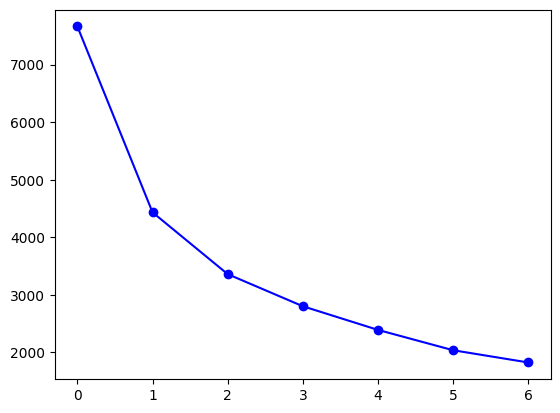

In [373]:
plt.plot(ssd,'o-b')


##Dendrogram

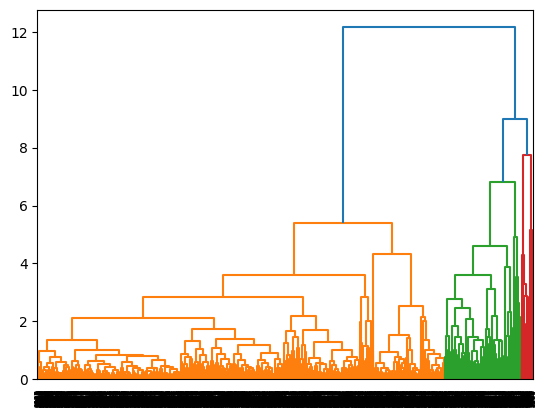

In [374]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no

### ML Model - 2 KMeans Clustering For 3 Cluster

In [375]:

kmean_clustor1=KMeans(n_clusters=3, max_iter=50)

In [376]:
kmean_clustor1.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=3)

In [377]:
kmean_clustor1.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [378]:
# Visualizing evaluation Metric Score chart
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor1=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor1.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor1.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.4814786837400833


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.46627005641897035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.41771162187117405


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.41576885949761966


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.4030500395429641


#### 2. Cross- Validation & Hyperparameter Tuning

In [379]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor1=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor1.fit(trans_scaled_df)
  ssd.append(kmean_clustor1.inertia_)





/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

##Elbow chart

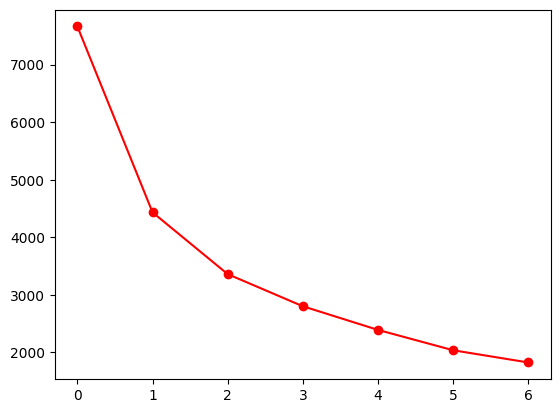

In [380]:
plt.plot(ssd,'o-r')

##Dendrogram

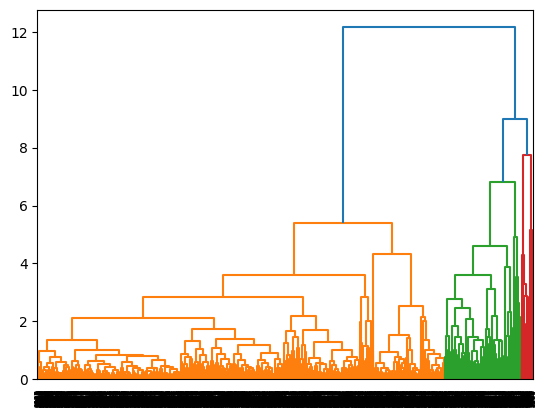

In [381]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no

### ML Model - 3 KMeans Clustering For 5 Cluster

In [382]:
# ML Model - 3 Implementation
kmean_clustor2=KMeans(n_clusters=5, max_iter=50)



In [383]:
# Fit the Algorithm
kmean_clustor2.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=5)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [384]:
# Visualizing evaluation Metric Score chart
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor2=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor2.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor2.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.4777820100216849


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.4646444032280179


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.4169515238218781


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.41575956198830083


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.409534691907499


#### 2. Cross- Validation & Hyperparameter Tuning

In [385]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor2=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor2.fit(trans_scaled_df)
  ssd.append(kmean_clustor2.inertia_)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

##Elbow chart

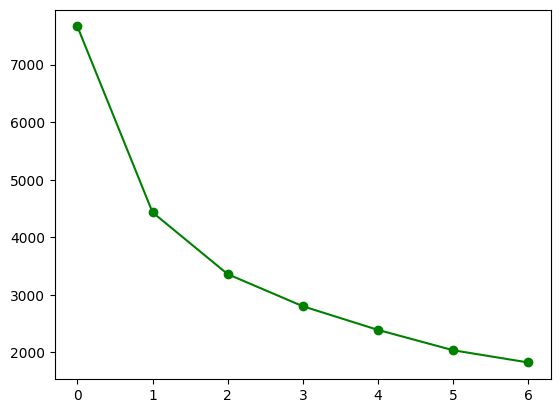

In [386]:
plt.plot(ssd,'o-g')

##Dendrogram

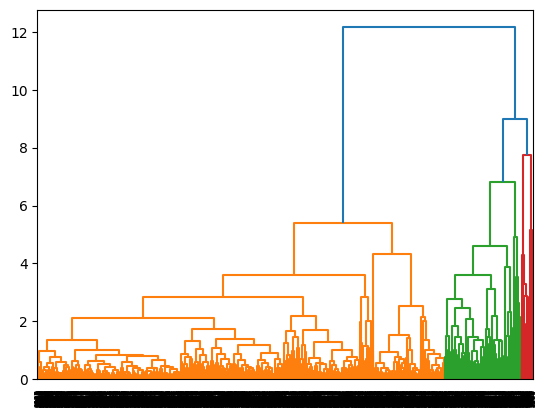

In [387]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Elbow chart:
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

KMeans Clustering For 3 Cluster

In [388]:
# Implementation
kmean_clustor=KMeans(n_clusters=3, max_iter=50)
kmean_clustor


KMeans(max_iter=50, n_clusters=3)

In [389]:
# Fit the Algorithm
kmean_clustor.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=3)

In [390]:
kmean_clustor.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [391]:
# Data set 
grouped_df['clustor_id']=kmean_clustor.labels_
grouped_df

,CustomerID,amount,frequency,recency,clustor_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


<Axes: xlabel='clustor_id', ylabel='amount'>

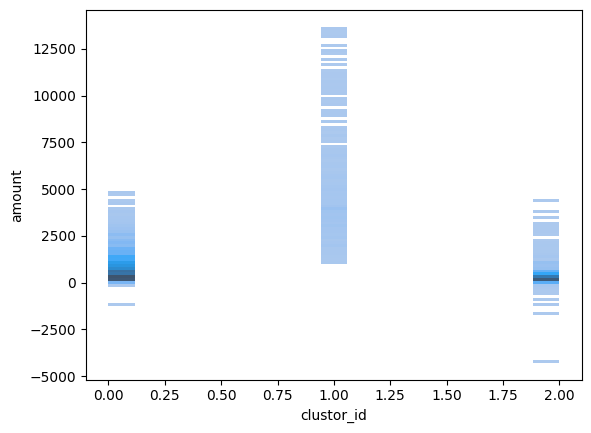

In [392]:
sns.histplot(x="clustor_id",y="amount",data=grouped_df)

<Axes: xlabel='clustor_id', ylabel='frequency'>

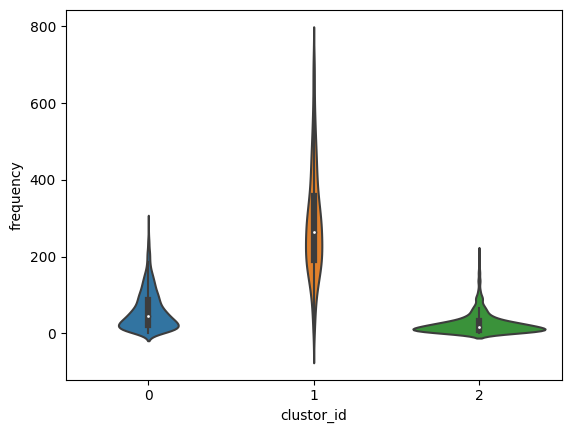

In [393]:
sns.violinplot(x="clustor_id",y="frequency",data=grouped_df)

<Axes: xlabel='clustor_id', ylabel='recency'>

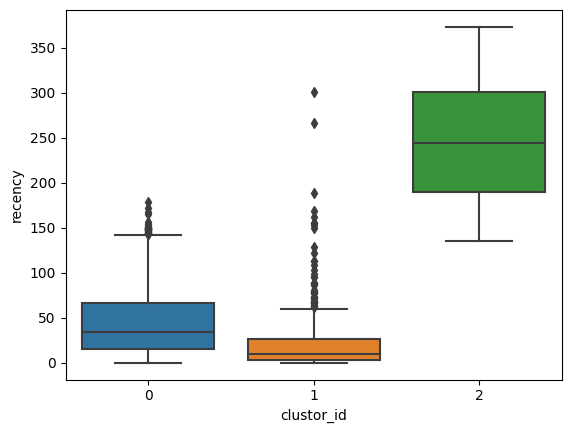

In [394]:
sns.boxplot(x="clustor_id",y="recency",data=grouped_df)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [395]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [396]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*  White Hanging heat T-Light holder is the most demanding gift of all.
*  Lunch bag black skull is the least demanding gift of all.

*  The UK has placed maximum orders for unique gift items.
*  After the UK, Germany placed maximum orders for unique gift items.

*  The UK has to purchase a total of $4.2 million in gift items.

*  The Netherlands has purchased a total of $200 k gift items.

*  Online retail gift shop generates $ 8 + million in revenue from the UK only.

*  WORLD WAR 2 GLIDERS is the most bought item ever with 53847 quantity.

*  DOT stock code gift generated a total of $ 2,06,245 in revenue.

*  22423 Stock code gift generated a total of $ 1,64,762 in revenue.

*  invoice NO 581483 has a total of $ 168469 sold.

*  invoice NO 541431 has a total of $ 77183.60 sold.

*  invoice NO 581483 has a total of $ 168469 sold.

* invoice NO 541431 has a total of $ 77183.60 sold

*  invoice NO 581483 contains a total of 80995 quantity gift items.


*  invoice NO  541431	contain a total	of 74215 quantity gift items..

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***